In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy
from scipy.optimize import curve_fit

import jaqalpaq
from jaqalpaq.parser import parse_jaqal_file
from jaqalpaq.emulator import run_jaqal_circuit

from noisy import JaqalNoisyEmulator

mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'

In [2]:
def gaussian_func(x, alpha):
    return alpha**(x**2)

def exponential_func(x, alpha):
    return alpha**(x)

def get_layer_count(jaqal_file):
    layer_count = 0
    with open(jaqal_file, mode='r') as f:
        for line in f:
            if line.startswith("MS"):
                layer_count += 1
    return layer_count

def simulate_results_RAV(dir_name, backend, output_file_name):
    jaqal_files = [f'{dir_name}/{f}' for f in os.listdir(dir_name)]

    output_data = []
    for jaqal_file in jaqal_files:
        try:
            layer_count = get_layer_count(jaqal_file)
            jaqal_statements = ''
            with open(jaqal_file, mode='r') as f:
                jaqal_statements += f.read()
            compiled_jaqal = f'''
                {jaqal_statements}
            '''
            print(f'Simulating RAV sequence of length {layer_count:4}...', end=' ')

            jaqal_circuit = parse_jaqal_string(compiled_jaqal)
            jaqal_circuit_results = run_jaqal_circuit(jaqal_circuit, backend=noisy_backend)
            jaqal_circuit_results_ideal = run_jaqal_circuit(jaqal_circuit, backend=ideal_backend)
            
            success_rate = (
                (jaqal_circuit_results.subcircuits[0].probability_by_int[0] - 1/system_dimension) /
                (jaqal_circuit_results_ideal.subcircuits[0].probability_by_int[0] - 1/system_dimension)
            )
            print(f"Success probability: {success_rate:.6f}")

            output_data.append({
                "file_name": jaqal_file,
                "layer_count": layer_count,
                "success_rate": success_rate
            })
        except:
            print("skipping", jaqal_file)
            raise

    with open(f'{output_file_name}', 'w') as f:
        f.write(repr(output_data))
    return output_data

def simulate_results_XEB(dir_name, backend, output_file_name):
    jaqal_files = [f'{dir_name}/{f}' for f in os.listdir(dir_name)]

    output_data = []
    for jaqal_file in jaqal_files:
        try:
            layer_count = get_layer_count(jaqal_file)
            jaqal_statements = ''
            with open(jaqal_file, mode='r') as f:
                jaqal_statements += f.read()
            compiled_jaqal = f'''
                {jaqal_statements}
            '''
            print(f'Simulating XEB sequence of length {layer_count:4}...', end=' ')

            jaqal_circuit = parse_jaqal_string(compiled_jaqal)
            jaqal_circuit_results = run_jaqal_circuit(jaqal_circuit, backend=noisy_backend)
            jaqal_circuit_results_ideal = run_jaqal_circuit(jaqal_circuit, backend=ideal_backend)
            
            ideal_output_probs = jaqal_circuit_results_ideal.subcircuits[0].probability_by_int
            noisy_output_probs = jaqal_circuit_results.subcircuits[0].probability_by_int
            
            e_u = np.sum(ideal_output_probs**2)
            u_u = np.sum(ideal_output_probs) / system_dimension
            m_u = np.sum(ideal_output_probs * noisy_output_probs)
            y = m_u - u_u
            x = e_u - u_u
            xeb_fidelity = (x * y) / (x ** 2)
            print(f"XEB fidelity: {xeb_fidelity:.6f}")

            output_data.append({
                "file_name": jaqal_file,
                "layer_count": layer_count,
                "success_rate": xeb_fidelity
            })
        except:
            print("skipping", jaqal_file)
            raise

    with open(f'{output_file_name}', 'w') as f:
        f.write(repr(output_data))
    return output_data    

**** Simulating for coherent_error=0.0 ****
**** Simulating for coherent_error=0.05 ****
**** Simulating for coherent_error=0.1 ****
**** Simulating for coherent_error=0.15 ****
**** Simulating for coherent_error=0.2 ****
**** Simulating for coherent_error=0.25 ****
**** Simulating for depolarizing_error=0.0 ****
**** Simulating for depolarizing_error=0.001 ****
**** Simulating for depolarizing_error=0.0025 ****
**** Simulating for depolarizing_error=0.005 ****
**** Simulating for depolarizing_error=0.01 ****
**** Simulating for depolarizing_error=0.02 ****
for exponential, reduced_chi_square = 1.3493684109188584
error_per_layer = 0.016190 ± 0.002219
for gaussian, reduced_chi_square = 1.3455063193385255
error_per_layer = 0.015605 ± 0.005536


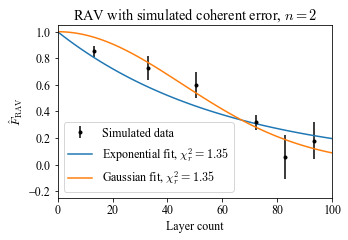

**** Simulating for coherent_error=0.0 ****
**** Simulating for coherent_error=0.05 ****
**** Simulating for coherent_error=0.1 ****
**** Simulating for coherent_error=0.15 ****
**** Simulating for coherent_error=0.2 ****
**** Simulating for coherent_error=0.25 ****
**** Simulating for depolarizing_error=0.0 ****
**** Simulating for depolarizing_error=0.001 ****
**** Simulating for depolarizing_error=0.0025 ****
**** Simulating for depolarizing_error=0.005 ****
**** Simulating for depolarizing_error=0.01 ****
**** Simulating for depolarizing_error=0.02 ****
for exponential, reduced_chi_square = 1.7203212037833846
error_per_layer = 0.012261 ± 0.000584
for gaussian, reduced_chi_square = 11.780256715271133
error_per_layer = 0.014141 ± 0.005172


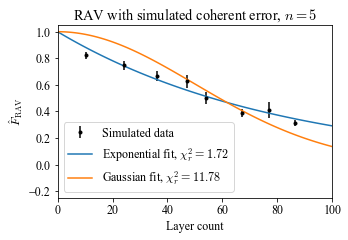

In [3]:
coherent_error_list = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]
depolarizing_error_list = [0.0, 0.001, 0.0025, 0.005, 0.01, 0.02]

settings = {
    2: {
        'sequences_folder': 'data/20220404_163137', 
        'simulation_output_folder': 'data/simulation_results_2q',
    },
    5: {
        'sequences_folder': 'data/20220520_170803', 
        'simulation_output_folder': 'data/simulation_results_5q',
    },
}

for n_qubits in settings:
    sequences_folder = settings[n_qubits]['sequences_folder']
    simulation_output_folder = settings[n_qubits]['simulation_output_folder']
    
    system_dimension = 2**n_qubits

    ideal_backend = JaqalNoisyEmulator(
       n_qubits,
       depolarization=0,
       r_rotation_error=0,
       r_phase_error=0,
       ms_rotation_error=0,
       ms_phase_error=0)
    
    #
    # Load simulation results from files
    # (or, do the simulations if the files don't exist)
    #
    rav_results_coherent_error = {}
    rav_results_depolarizing_error = {}
    xeb_results_coherent_error = {}
    xeb_results_depolarizing_error = {}
    
    def simulate_RAV(noisy_backend, param_id):
        rav_filename = f'{simulation_output_folder}/rav_simulation_{param_id}'
        if not os.path.exists(rav_filename):
            assert False, rav_filename #simulate_results_RAV(f"{sequences_folder}/rav", noisy_backend, rav_filename)
        with open(rav_filename, mode='r') as rav_file:
            rav_results = eval(rav_file.read())
        return rav_results

    def simulate_XEB(noisy_backend, param_id):
        xeb_filename = f'{simulation_output_folder}/xeb_simulation_{param_id}'
        if not os.path.exists(xeb_filename):
            assert False, xeb_filename #simulate_results_XEB(f"{sequences_folder}/xeb", noisy_backend, xeb_filename)
        with open(xeb_filename, mode='r') as xeb_file:
            xeb_results = eval(xeb_file.read())
        return xeb_results
    
    for coherent_error in coherent_error_list:
        print(f"**** Simulating for coherent_error={coherent_error} ****")
        noisy_backend = JaqalNoisyEmulator(
           n_qubits,
           depolarization=0,
           r_rotation_error=coherent_error,
           r_phase_error=0,
           ms_rotation_error=coherent_error,
           ms_phase_error=0)
        rav_results_coherent_error[coherent_error] = simulate_RAV(noisy_backend, 'coherent_'+str(coherent_error))
        xeb_results_coherent_error[coherent_error] = simulate_XEB(noisy_backend, 'coherent_'+str(coherent_error))

    for depolarizing_error in depolarizing_error_list:
        print(f"**** Simulating for depolarizing_error={depolarizing_error} ****")
        noisy_backend = JaqalNoisyEmulator(
           n_qubits,
           depolarization=depolarizing_error,
           r_rotation_error=0,
           r_phase_error=0,
           ms_rotation_error=0,
           ms_phase_error=0)
        rav_results_depolarizing_error[depolarizing_error] = simulate_RAV(noisy_backend, 'depolarizing_'+str(depolarizing_error))
        xeb_results_depolarizing_error[depolarizing_error] = simulate_XEB(noisy_backend, 'depolarizing_'+str(depolarizing_error))
    
    #
    # Plot results
    #
    protocol = "RAV"
    results = rav_results_coherent_error
    coherent_error = 0.15

    sorted_results = sorted(results[coherent_error], key=lambda r: r['layer_count'])

    x = [r['layer_count'] for r in sorted_results]
    y = [r['success_rate'] for r in sorted_results]

    plt.figure(figsize=(5,3.5))

    x_max = 100
    x_fit = np.linspace(0, x_max, 100)

    bin_size = 6
    x_bin = np.array([np.mean(x[i:i+bin_size]) for i in range(0, len(x)-(len(x)%bin_size), bin_size)])
    y_bin = np.array([np.mean(y[i:i+bin_size]) for i in range(0, len(y)-(len(y)%bin_size), bin_size)])
    y_bin_stderr = np.array([np.std(y[i:i+bin_size])/np.sqrt(bin_size) for i in range(0, len(y)-(len(y)%bin_size), bin_size)])

    plt.errorbar(x_bin, y_bin, yerr=y_bin_stderr, marker='.', linestyle='', label='Simulated data', color='k')

    popt, pcov = curve_fit(exponential_func, x_bin, y_bin) #, sigma=y_bin_stderr, p0=[1])
    perr = np.sqrt(np.diag(pcov))[0]
    error_per_layer = 1-popt[0]
    y_fit_exponential = exponential_func(x_bin, *popt)

    chi_square = np.sum((y_bin - y_fit_exponential)**2 / y_bin_stderr**2)
    dof = len(y_bin) - len(popt)
    reduced_chi_square = chi_square / dof
    print('for exponential, reduced_chi_square =', reduced_chi_square)
    print(f'error_per_layer = {error_per_layer:.6f} ± {perr:.6f}')
    plt.plot(x_fit, exponential_func(x_fit, *popt), label=fr'Exponential fit, $\chi^2_r={reduced_chi_square:.2f}$')

    popt, pcov = curve_fit(gaussian_func, x_bin, y_bin) #, sigma=y_bin_stderr, p0=[1])
    perr = np.sqrt( np.sqrt(np.diag(pcov))[0] )
    error_per_layer = np.sqrt(1-popt[0])
    y_fit_gaussian = gaussian_func(x_bin, *popt)

    chi_square = np.sum((y_bin - y_fit_gaussian)**2 / y_bin_stderr**2)
    dof = len(y_bin) - len(popt)
    reduced_chi_square = chi_square / dof
    print('for gaussian, reduced_chi_square =', reduced_chi_square)
    print(f'error_per_layer = {error_per_layer:.6f} ± {perr:.6f}')
    plt.plot(x_fit, gaussian_func(x_fit, *popt), label=fr'Gaussian fit, $\chi^2_r={reduced_chi_square:.2f}$')

    plt.ylim(-0.25, 1.05)
    plt.xlim(0, x_max)
    plt.title(fr'RAV with simulated coherent error, $n={n_qubits}$')
    plt.xlabel('Layer count')
    plt.ylabel(r'$\hat{F}_{\rm RAV}$')

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2, 0, 1]
    plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='lower left')

    plt.tight_layout()
    plt.savefig(f'fig5_{n_qubits}q.pdf', bbox_inches='tight')

    plt.show()